* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

## Erzeuge einen DataFrame aus `student-math.csv`

In [4]:
stud = pd.read_csv("./data/student-math.csv")
stud.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

## Ermittle nach Geschlechtern gruppiert den durchschnittlichen Alkoholkonsum

In [5]:
stud["Talc"] = (stud["Walc"] + stud["Dalc"]) / 2
stud["Talc"]
print(stud.groupby(by="sex")["Talc"].mean())

sex
F    1.605769
M    2.197861
Name: Talc, dtype: float64


## Ermittle jene 3 Features, welche am meisten Einfluss auf `G3` haben, abgesehen von `G1` und `G2`


In [6]:
stud.corr()["G3"].drop(["G1", "G2", "G3"]).sort_values(ascending=False).iloc[0:3]

Medu         0.217147
Fedu         0.152457
studytime    0.097820
Name: G3, dtype: float64

## Ermittle jene 3 Features, welche am meisten Einfluss auf `Walc` haben

In [7]:
stud.corr()["Walc"].drop(["Walc", "Talc"]).sort_values(ascending=False).iloc[0:3]

Dalc          0.647544
goout         0.420386
traveltime    0.151604
Name: Walc, dtype: float64

## Ermittle die Absenzzahl jenes Schülers mit den meisten Absenzen, der trotzdem >= 10 G3 hat

In [8]:
#stud[(stud["G3"] >= 10) & (stud["absences"] == stud[stud["G3"] >= 10]["absences"].max())]["absences"].values[0]
stud[stud["G3"] >= 10]["absences"].max()

54

## Ermittle, ob die Schüler mit mehr als 18 Punkten eher aus dem ruralen oder aus dem urbanen Raum kommen

U    5
R    1
Name: address, dtype: int64


C:\Users\Krane-User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='address', ylabel='count'>

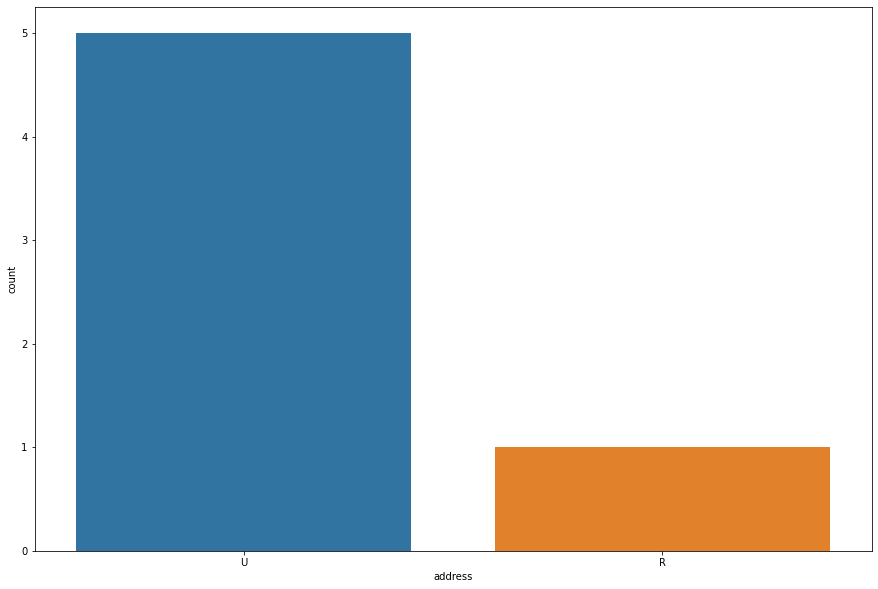

In [9]:
ru = stud[stud["G3"] > 18]["address"]
print(ru.value_counts())
sns.countplot(ru)

## Versuche, folgende Behauptung zu widerlegen:
"Dass die Eltern unter einem Dach leben ist sehr wichtig für eine **herausragende** Mathematiknote, immerhin leben doppelt so viele dieser Schüler mit **beiden** Eltern zusammen"

0.31622776601683894
Eine correlation von 0.31 -> Behauptung widerlegt.


<AxesSubplot:xlabel='G3', ylabel='count'>

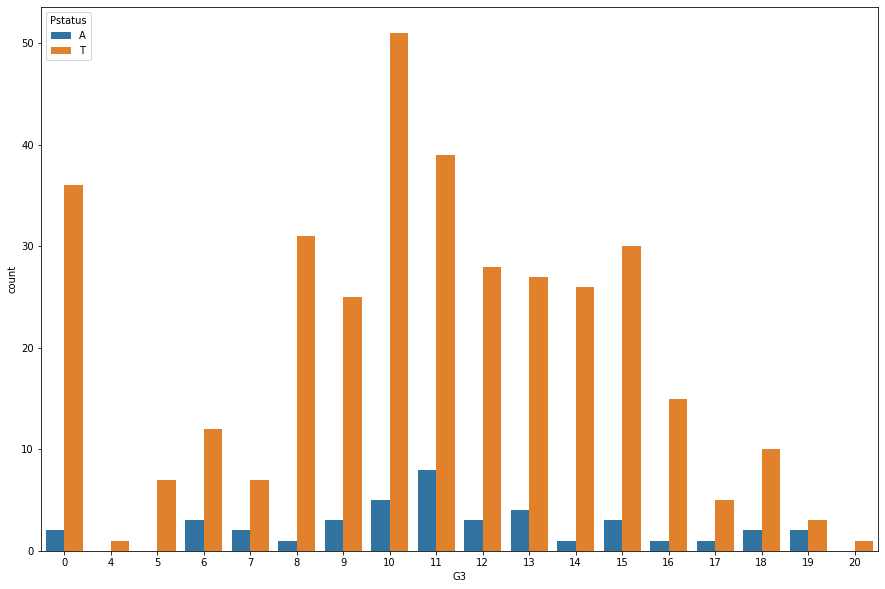

In [10]:
stud2 = stud[stud["G3"] > 18].copy()
stud2["Pstatus"].replace("T", 1, inplace=True) #.loc[stud2["Pstatus"] == "T", "Pstatus"] = 1
stud2["Pstatus"].replace("A", 0, inplace=True) #.loc[stud2["Pstatus"] == "A", "Pstatus"] = 0
print(stud2[stud2["G3"] > 18].corr()["G3"].sort_values(ascending=False)["Pstatus"])
print("Eine correlation von 0.31 -> Behauptung widerlegt.")
sns.countplot(data=stud, x="G3", hue="Pstatus")

## Erzeuge folgende Graphik, welche die Punkte nach Adresse darstellt
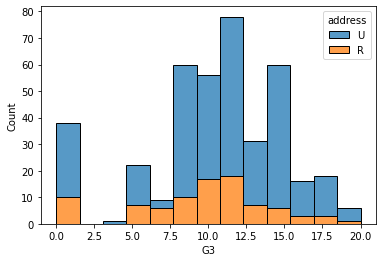

<AxesSubplot:xlabel='G3', ylabel='Count'>

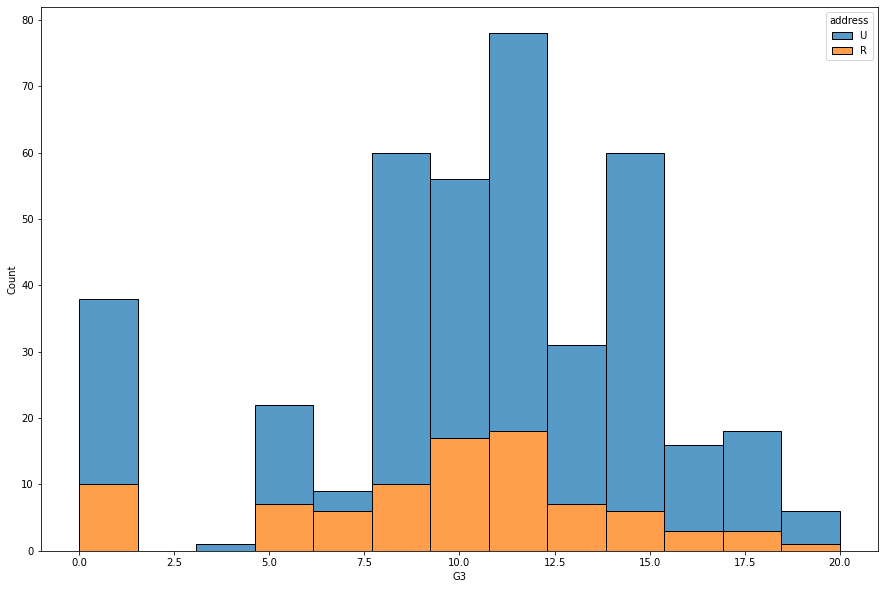

In [11]:
sns.histplot(stud, x="G3", hue="address", multiple="stack")

## Ermittle die durchschnittliche Punktzahl aller Schüler, bei denen Mutter und Vater derselben Berufsgruppe angehören, gruppiert nach Berufsgruppe

In [12]:
stud[stud["Mjob"] == stud["Fjob"]].groupby(by="Mjob")["G3"].mean()

Mjob
at_home     12.285714
health      13.500000
other        9.798077
services    10.767442
teacher     13.083333
Name: G3, dtype: float64

## Ersetze fehlende Werte durch den **Median** der jeweiligen `address`

In [13]:
print(stud.isnull().sum()) # traveltime: 36
stud["traveltime"] = stud.groupby("address")["traveltime"].apply(lambda category: category.fillna(category.median()))
stud.isnull().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    36
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
Talc           0
dtype: int64


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Talc          0
dtype: int64